## Introduction to Neural Network Classification with TF
In this notebook we are going to learn how to write neural networks for classification problems.
A classification is where we try to classify something as one thing or another.

### Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [5]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]], shape=(1000, 2))

In [3]:
# Checking labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [6]:
# Our data is a little hard to understand like this right now so lets visualize it.
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


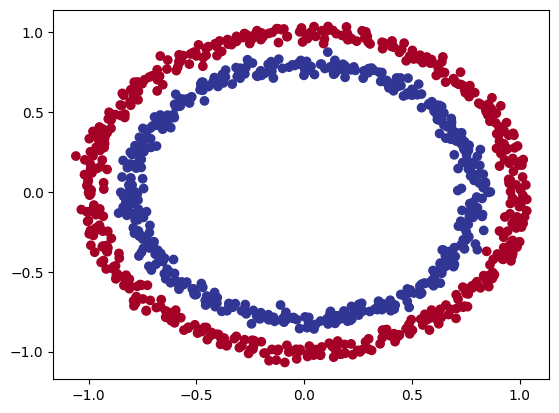

In [11]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [9]:
# Check the shape of our features and labels
X.shape , y.shape

((1000, 2), (1000,))

In [ ]:
# View the first sample
X[0], y[0] # so we want to take the X data to predict the y data. 2 features for 1.

(array([0.75424625, 0.23148074]), np.int64(1))

### simple modelling

In [15]:
import tensorflow as tf

# set random seed
tf.random.set_seed(42)

# Creating the model using the sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - accuracy: 0.4670 - loss: 2.4929
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - accuracy: 0.4940 - loss: 0.7456
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - accuracy: 0.4940 - loss: 0.7085
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step - accuracy: 0.4930 - loss: 0.6985
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step - accuracy: 0.4890 - loss: 0.6955


In [17]:
# Lets try improving our model
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

model_2.fit(X, y, epochs=100, verbose=0)

In [18]:
model_2.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - accuracy: 0.5000 - loss: 0.6933


[0.6932530999183655, 0.5]

In [24]:
# We have to introduce Non-Linearity 

tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_3.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

history = model_3.fit(X, y, epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4990 - loss: 0.6976   
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - accuracy: 0.5030 - loss: 0.6958
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step - accuracy: 0.5030 - loss: 0.6943
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - accuracy: 0.5030 - loss: 0.6930
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - accuracy: 0.5090 - loss: 0.6919
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step - accuracy: 0.5130 - loss: 0.6909
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step - accuracy: 0.5170 - loss: 0.6899
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step - accuracy: 0.5140 - loss: 0.6890
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - accuracy: 0.5120 - loss: 0.6881
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step - accuracy: 0.5160 - loss: 0.6872
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - accuracy: 0.5240 - loss: 0.6863
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
model_3.evaluate(X, y) # Adding hidden layer relu and outer layer sigmoid really did help increase the accuracy

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step - accuracy: 0.9500 - loss: 0.4221


[0.4220830500125885, 0.949999988079071]

In [ ]:
# Use NON linear activation functions inside hidden layers always, be it regression or classification.
# Only in output layer for regression you dont need an activation func but for classification if binary then sigmoid and if multiclass then softmax.

### Improving the model with train/test split

In [26]:
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

In [29]:
# Lets recreate a model to fit on the training data and evaluate on the testing data!
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_4.compile(loss=tf.keras.losses.BinaryCrossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy', 'precision', 'recall'])

history = model_4.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5163 - loss: 0.6903 - precision: 0.5164 - recall: 0.5511   
Epoch 2/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5425 - loss: 0.6855 - precision: 0.5351 - recall: 0.6658 
Epoch 3/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5575 - loss: 0.6821 - precision: 0.5572 - recall: 0.5711 
Epoch 4/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5412 - loss: 0.6782 - precision: 0.5455 - recall: 0.5087 
Epoch 5/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5337 - loss: 0.6738 - precision: 0.5385 - recall: 0.4888 
Epoch 6/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5437 - loss: 0.6682 - precision: 0.5500 - recall: 0.4938 
Epoch 7/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5688 - loss: 0.6613 - precision: 0.5749 - recall: 0.5362 
Epoch 8/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5900 - loss: 0.6522 - precision: 0.5934 - recall: 0.5786 
Epoch 9/25
25/25 ━━━━━

In [30]:
model_4.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9000 - loss: 0.3250 - precision: 0.8435 - recall: 0.9798  


[0.3250112533569336, 0.8999999761581421, 0.843478262424469, 0.9797979593276978]

In [31]:
# Using the history variable to plot a loss curve
pd.DataFrame(history.history)

,accuracy,loss,precision,recall
0,0.51625,0.690267,0.516355,0.551122
1,0.54250,0.685518,0.535070,0.665835
2,0.55750,0.682103,0.557178,0.571072
3,0.54125,0.678199,0.545455,0.508728
4,0.53375,0.673786,0.538462,0.488778
5,0.54375,0.668248,0.550000,0.493766
6,0.56875,0.661306,0.574866,0.536160
7,0.59000,0.652198,0.593350,0.578554
8,0.61000,0.639273,0.609337,0.618454
9,0.64125,0.627555,0.625551,0.708229


Text(0.5, 1.0, 'Model_4 loss curves')

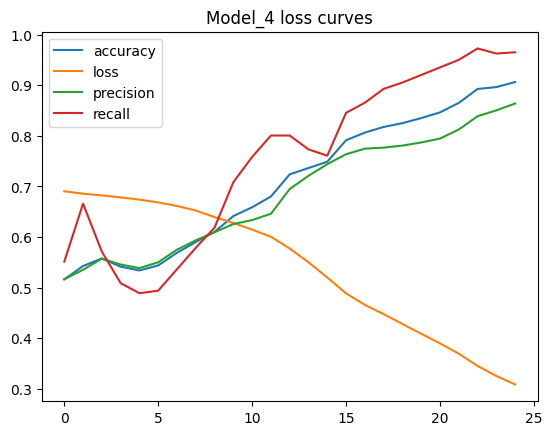

In [33]:
pd.DataFrame(history.history).plot()
plt.title("Model_4 loss curves")

In [ ]:
# For many problems the loss function going down means the model is improving.

### Using callbacks to find the model's best learning rate

In [40]:
# Set random seed
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',      # what metric to watch
    patience=3,              # how many epochs to wait before stopping
    restore_best_weights=True  # revert to best model weights
)

history_5 = model_5.fit(
    X_train, y_train,
    epochs=500,
    callbacks=[early_stop]
)

Epoch 1/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5075 - loss: 0.6957   
Epoch 2/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5075 - loss: 0.6945 
Epoch 3/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - accuracy: 0.4988 - loss: 0.6937
Epoch 4/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - accuracy: 0.5050 - loss: 0.6930
Epoch 5/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - accuracy: 0.5050 - loss: 0.6925
Epoch 6/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step - accuracy: 0.5038 - loss: 0.6919
Epoch 7/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 918us/step - accuracy: 0.5050 - loss: 0.6914
Epoch 8/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - accuracy: 0.5050 - loss: 0.6909
Epoch 9/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 918us/step - accuracy: 0.5100 - loss: 0.6904
Epoch 10/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step - accuracy: 0.5138 - loss: 0.6900
Epoch 11/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - accuracy: 0.5175 - loss: 0.6895
Epoch 12/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0

In [41]:
model_5.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9900 - loss: 0.0372 


[0.03719383850693703, 0.9900000095367432]

In [42]:
# Making a confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = model_5.predict(X_test)

confusion_matrix(y_test, y_pred)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [44]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [ ]:
y_pred[:10] # Looks like our predictions array are in predictions probability form, the standard output from the sigmoid or softmax acti functions

array([[9.9998850e-01],
       [9.9998838e-01],
       [9.9987328e-01],
       [9.9799317e-01],
       [1.9184317e-04],
       [4.1998914e-03],
       [9.6782297e-01],
       [3.3083165e-08],
       [9.9614108e-01],
       [3.2280881e-02]], dtype=float32)

In [46]:
tf.round(y_pred)

<tf.Tensor: shape=(200, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
 

In [48]:
confusion_matrix(y_test, tf.round(y_pred))

array([[99,  2],
       [ 0, 99]])

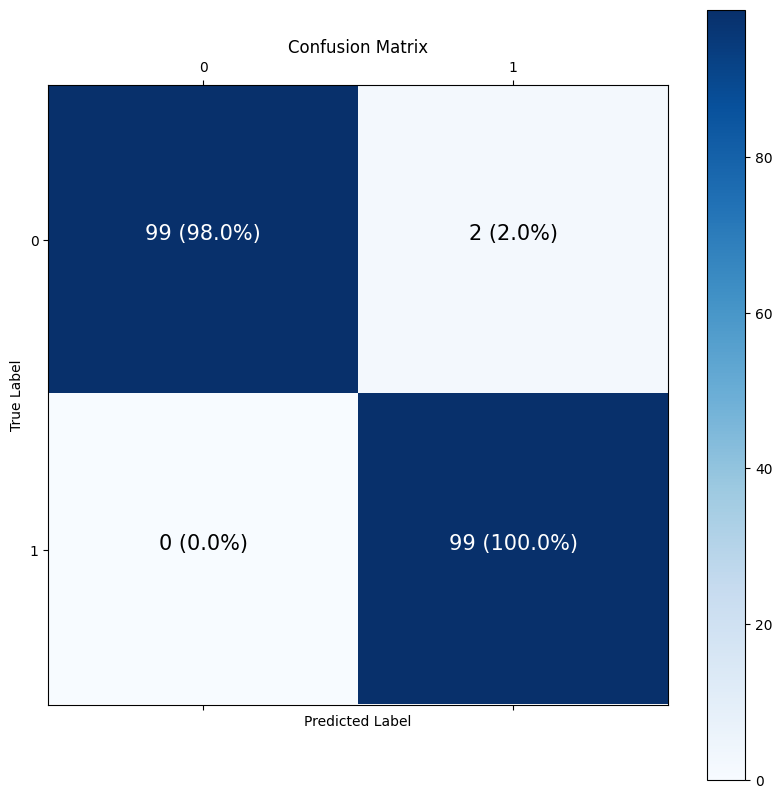

In [ ]:
import itertools
import numpy as np
figsize = (10,10)

cm = confusion_matrix(y_test, tf.round(y_pred))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
n_classes = cm.shape[0]

fig, ax = plt.subplots(figsize=figsize)
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

classes = False
if classes:
    labels = classes
else:
    labels = np.arange(cm.shape[0])

ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

threshold = (cm.max() + cm.min()) / 2

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i,j]*100:.1f}%)",
             horizontalalignment='center',
             color="white" if cm[i,j] > threshold else "black",
             size=15)
